## Importing the libraries

In [76]:
import config

In [20]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [21]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

## Getting the playlist from Spotify

In [22]:
playlist = sp.user_playlist_tracks("spotify", "7IQhUg1E2K1055KnaIZZRE",market="GB")
playlist

{'href': 'https://api.spotify.com/v1/playlists/7IQhUg1E2K1055KnaIZZRE/tracks?offset=0&limit=100&market=GB&additional_types=track',
 'items': [{'added_at': '2016-08-28T15:24:45Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/mattyhunt622'},
    'href': 'https://api.spotify.com/v1/users/mattyhunt622',
    'id': 'mattyhunt622',
    'type': 'user',
    'uri': 'spotify:user:mattyhunt622'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
       'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
       'id': '74ASZWbe4lXaubB36ztrGX',
       'name': 'Bob Dylan',
       'type': 'artist',
       'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6YabPKtZAjxwyWbuO9p4ZD'},
     'href': 'https://api.spotify.com/v1/albums/6YabPKtZAjxwyWbu

In [23]:
print(list(playlist.keys())) 
print("Total number of songs in the playlist: ",playlist["total"]) 
len(playlist["items"]) 

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
Total number of songs in the playlist:  3672


100

### Extracting the songs of a playlist

##### To add the next page of the spotify playlist

In [24]:
def get_playlist_tracks(username, playlist_id):
    playlist = sp.user_playlist_tracks(username, playlist_id, market="GB")
    tracks = playlist['items']
    while playlist['next']:
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])
    return tracks

In [25]:
playlist = (get_playlist_tracks("spotify", "7IQhUg1E2K1055KnaIZZRE"))
print(len(playlist))

3672


### Getting the Audio features

In [26]:
sp.audio_features(playlist[0]['track']['uri'])

[{'danceability': 0.482,
  'energy': 0.721,
  'key': 0,
  'loudness': -6.839,
  'mode': 1,
  'speechiness': 0.0321,
  'acousticness': 0.731,
  'instrumentalness': 0,
  'liveness': 0.189,
  'valence': 0.557,
  'tempo': 95.263,
  'type': 'audio_features',
  'id': '3AhXZa8sUQht0UEdBJgpGc',
  'uri': 'spotify:track:3AhXZa8sUQht0UEdBJgpGc',
  'track_href': 'https://api.spotify.com/v1/tracks/3AhXZa8sUQht0UEdBJgpGc',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3AhXZa8sUQht0UEdBJgpGc',
  'duration_ms': 369600,
  'time_signature': 4}]

### Getting list of Song Id's

In [43]:
list_of_songs=[]
for index in range(0,len(playlist)):
    list_of_songs.append((playlist[index]['track']["id"]))


In [45]:
list_of_songs

['3AhXZa8sUQht0UEdBJgpGc',
 '4CeeEOM32jQcH3eN9Q2dGj',
 '0hKRSZhUGEhKU6aNSPBACZ',
 '5t9KYe0Fhd5cW6UYT4qP8f',
 '2PzU4IB8Dr6mxV3lHuaG34',
 '1tqT6DhmsrtQgyCKUwotiw',
 '2G2YzndIA6jeWFPBXhUjh5',
 '3Am0IbOxmvlSXro7N5iSfZ',
 '7s25THrKz86DM225dOYwnr',
 '3Um9toULmYFGCpvaIPFw7l',
 '2JO3HwMRPeya8bXbtbyPcf',
 '2QfiRTz5Yc8DdShCxG1tB2',
 '6hTcuIQa0sxrrByu9wTD7s',
 '4u9f8hqstB7iITDJNzKhQx',
 '6xNwKNYZcvgV3XTIwsgNio',
 '5ChkMS8OtdzJeqyybCc9R5',
 '4Y4Gd3ty8uut6Qw43c7yJc',
 '6iGU74CwXuT4XVepjc9Emf',
 '5moTxUGPZXgGmosl4rIELm',
 '1Ud6moTC0KyXMq1Oxfien0',
 '5jzma6gCzYtKB1DbEwFZKH',
 '5CQ30WqJwcep0pYcV4AMNc',
 '2mHchPRtQWet3iIS3jANr1',
 '1J2tfINpEHRhCP8CUS15lE',
 '7pKfPomDEeI4TPT6EOYjn9',
 '7Jh1bpe76CNTCgdgAdBw4Z',
 '6H3kDe7CGoWYBabAeVWGiD',
 '0xytfctyaudqnrQujHIz3s',
 '3AszgPDZd9q0DpDFt4HFBy',
 '09nZ9ZDWq1rTkmM3WjvMvF',
 '0iA3xXSkSCiJywKyo1UKjQ',
 '6hHc7Pks7wtBIW8Z6A0iFq',
 '6RvJigkrHaxStGN2shMJ7h',
 '4N0TP4Rmj6QQezWV88ARNJ',
 '19jo0UT2vqD4pNVfIqTy4R',
 '5LxvwujISqiB8vpRYv887S',
 '2iXcvnD3d1gfLBum0cE5Eg',
 

## Appending audio features in the list

In [51]:
list_audio_features= []
for i in list_of_songs:
    feat = sp.audio_features(i)
    list_audio_features.append(feat[0])

In [52]:
list_audio_features

[{'danceability': 0.482,
  'energy': 0.721,
  'key': 0,
  'loudness': -6.839,
  'mode': 1,
  'speechiness': 0.0321,
  'acousticness': 0.731,
  'instrumentalness': 0,
  'liveness': 0.189,
  'valence': 0.557,
  'tempo': 95.263,
  'type': 'audio_features',
  'id': '3AhXZa8sUQht0UEdBJgpGc',
  'uri': 'spotify:track:3AhXZa8sUQht0UEdBJgpGc',
  'track_href': 'https://api.spotify.com/v1/tracks/3AhXZa8sUQht0UEdBJgpGc',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3AhXZa8sUQht0UEdBJgpGc',
  'duration_ms': 369600,
  'time_signature': 4},
 {'danceability': 0.502,
  'energy': 0.912,
  'key': 1,
  'loudness': -4.556,
  'mode': 1,
  'speechiness': 0.0564,
  'acousticness': 2.55e-05,
  'instrumentalness': 0.000173,
  'liveness': 0.106,
  'valence': 0.72,
  'tempo': 116.761,
  'type': 'audio_features',
  'id': '4CeeEOM32jQcH3eN9Q2dGj',
  'uri': 'spotify:track:4CeeEOM32jQcH3eN9Q2dGj',
  'track_href': 'https://api.spotify.com/v1/tracks/4CeeEOM32jQcH3eN9Q2dGj',
  'analysis_url': 'https://ap

## Creating a Data Frame

In [53]:
playlist = pd.json_normalize(list_audio_features)

In [54]:
playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.189,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.106,0.720,116.761,audio_features,4CeeEOM32jQcH3eN9Q2dGj,spotify:track:4CeeEOM32jQcH3eN9Q2dGj,https://api.spotify.com/v1/tracks/4CeeEOM32jQc...,https://api.spotify.com/v1/audio-analysis/4Cee...,301920,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.922,0.175,163.219,audio_features,0hKRSZhUGEhKU6aNSPBACZ,spotify:track:0hKRSZhUGEhKU6aNSPBACZ,https://api.spotify.com/v1/tracks/0hKRSZhUGEhK...,https://api.spotify.com/v1/audio-analysis/0hKR...,337413,4
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.109,0.385,133.449,audio_features,5t9KYe0Fhd5cW6UYT4qP8f,spotify:track:5t9KYe0Fhd5cW6UYT4qP8f,https://api.spotify.com/v1/tracks/5t9KYe0Fhd5c...,https://api.spotify.com/v1/audio-analysis/5t9K...,219027,4
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.128,0.931,136.302,audio_features,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,https://api.spotify.com/v1/audio-analysis/2PzU...,222813,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0.492,0.803,10,-5.911,0,0.3500,0.122000,0.000021,0.146,0.778,175.802,audio_features,4xyPqgnOnH076SJEW2QUwF,spotify:track:4xyPqgnOnH076SJEW2QUwF,https://api.spotify.com/v1/tracks/4xyPqgnOnH07...,https://api.spotify.com/v1/audio-analysis/4xyP...,245107,4
3668,0.859,0.848,1,-5.842,1,0.2160,0.029200,0.001510,0.304,0.610,123.937,audio_features,3EXPdW0NGGkPlyDMcScfgu,spotify:track:3EXPdW0NGGkPlyDMcScfgu,https://api.spotify.com/v1/tracks/3EXPdW0NGGkP...,https://api.spotify.com/v1/audio-analysis/3EXP...,294720,5
3669,0.402,0.873,4,-3.209,0,0.0586,0.004840,0.000073,0.157,0.684,125.443,audio_features,2fICdpdRotwfmGYzvs8Ngf,spotify:track:2fICdpdRotwfmGYzvs8Ngf,https://api.spotify.com/v1/tracks/2fICdpdRotwf...,https://api.spotify.com/v1/audio-analysis/2fIC...,253667,4
3670,0.542,0.454,2,-10.247,1,0.0250,0.645000,0.002790,0.150,0.267,96.881,audio_features,4jKq1e80xAYixkIwt6YyV1,spotify:track:4jKq1e80xAYixkIwt6YyV1,https://api.spotify.com/v1/tracks/4jKq1e80xAYi...,https://api.spotify.com/v1/audio-analysis/4jKq...,271720,4


In [56]:
#### save playlist as csv file
playlist.to_csv("playlisy_3672.csv", index = True)

In [60]:
### Importing csv
playlist = pd.read_csv("playlisy_3672.csv",index_col = 0)
playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.189,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.106,0.720,116.761,audio_features,4CeeEOM32jQcH3eN9Q2dGj,spotify:track:4CeeEOM32jQcH3eN9Q2dGj,https://api.spotify.com/v1/tracks/4CeeEOM32jQc...,https://api.spotify.com/v1/audio-analysis/4Cee...,301920,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.922,0.175,163.219,audio_features,0hKRSZhUGEhKU6aNSPBACZ,spotify:track:0hKRSZhUGEhKU6aNSPBACZ,https://api.spotify.com/v1/tracks/0hKRSZhUGEhK...,https://api.spotify.com/v1/audio-analysis/0hKR...,337413,4
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.109,0.385,133.449,audio_features,5t9KYe0Fhd5cW6UYT4qP8f,spotify:track:5t9KYe0Fhd5cW6UYT4qP8f,https://api.spotify.com/v1/tracks/5t9KYe0Fhd5c...,https://api.spotify.com/v1/audio-analysis/5t9K...,219027,4
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.128,0.931,136.302,audio_features,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,https://api.spotify.com/v1/audio-analysis/2PzU...,222813,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0.492,0.803,10,-5.911,0,0.3500,0.122000,0.000021,0.146,0.778,175.802,audio_features,4xyPqgnOnH076SJEW2QUwF,spotify:track:4xyPqgnOnH076SJEW2QUwF,https://api.spotify.com/v1/tracks/4xyPqgnOnH07...,https://api.spotify.com/v1/audio-analysis/4xyP...,245107,4
3668,0.859,0.848,1,-5.842,1,0.2160,0.029200,0.001510,0.304,0.610,123.937,audio_features,3EXPdW0NGGkPlyDMcScfgu,spotify:track:3EXPdW0NGGkPlyDMcScfgu,https://api.spotify.com/v1/tracks/3EXPdW0NGGkP...,https://api.spotify.com/v1/audio-analysis/3EXP...,294720,5
3669,0.402,0.873,4,-3.209,0,0.0586,0.004840,0.000073,0.157,0.684,125.443,audio_features,2fICdpdRotwfmGYzvs8Ngf,spotify:track:2fICdpdRotwfmGYzvs8Ngf,https://api.spotify.com/v1/tracks/2fICdpdRotwf...,https://api.spotify.com/v1/audio-analysis/2fIC...,253667,4
3670,0.542,0.454,2,-10.247,1,0.0250,0.645000,0.002790,0.150,0.267,96.881,audio_features,4jKq1e80xAYixkIwt6YyV1,spotify:track:4jKq1e80xAYixkIwt6YyV1,https://api.spotify.com/v1/tracks/4jKq1e80xAYi...,https://api.spotify.com/v1/audio-analysis/4jKq...,271720,4


### Dropping few columns

In [61]:
playlist = playlist.drop(playlist.columns[[11, 12, 13, 14, 15]], axis=1) 
playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.189,0.557,95.263,369600,4
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.106,0.720,116.761,301920,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.922,0.175,163.219,337413,4
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.109,0.385,133.449,219027,4
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.128,0.931,136.302,222813,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0.492,0.803,10,-5.911,0,0.3500,0.122000,0.000021,0.146,0.778,175.802,245107,4
3668,0.859,0.848,1,-5.842,1,0.2160,0.029200,0.001510,0.304,0.610,123.937,294720,5
3669,0.402,0.873,4,-3.209,0,0.0586,0.004840,0.000073,0.157,0.684,125.443,253667,4
3670,0.542,0.454,2,-10.247,1,0.0250,0.645000,0.002790,0.150,0.267,96.881,271720,4


### Normalising DataFrame

In [62]:
scaler = StandardScaler()
scaler.fit(playlist)
playlist_scaled = scaler.transform(playlist)
playlist_scaled_df = pd.DataFrame(playlist_scaled, columns = playlist.columns)
display(playlist.head())
print()
display(playlist_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.189,0.557,95.263,369600,4
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.106,0.720,116.761,301920,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.922,0.175,163.219,337413,4
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.109,0.385,133.449,219027,4
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.128,0.931,136.302,222813,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.482862,0.372482,-1.491205,0.572241,0.626491,-0.525534,1.409725,-0.442167,-0.019877,-0.133980,-0.964774,1.044618,0.207164
1,-0.364117,1.201145,-1.208544,1.164491,0.626491,-0.189938,-0.915206,-0.441433,-0.529928,0.526915,-0.186328,0.467102,0.207164
2,-1.183460,-0.772896,-0.360562,-1.327473,-1.596191,-0.036642,0.007084,-0.441717,4.484553,-1.682826,1.495921,0.769965,0.207164
3,-0.993467,-0.703479,1.335403,0.356665,-1.596191,-0.492389,0.121586,-0.441641,-0.511493,-0.831367,0.417946,-0.240226,0.207164
4,0.948020,0.988556,-0.925884,0.299593,0.626491,-0.502057,-0.793471,-0.307727,-0.394734,1.382429,0.521254,-0.207920,0.207164


### Clustering with K-Means

In [63]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(playlist_scaled_df)

KMeans(n_clusters=3, random_state=1234)

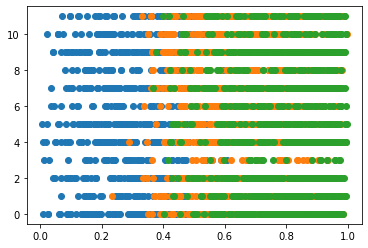

In [65]:
# assign a cluster to each example
labels = kmeans.predict(playlist_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(playlist.to_numpy()[row_ix, 1], playlist.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [66]:
clusters = kmeans.predict(playlist_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     917
1    1601
2    1154
dtype: int64

#### Adding cluster column

In [67]:
playlist["cluster"] = clusters
playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.189,0.557,95.263,369600,4,0
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.106,0.720,116.761,301920,4,2
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.922,0.175,163.219,337413,4,2
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.109,0.385,133.449,219027,4,2
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.128,0.931,136.302,222813,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0.492,0.803,10,-5.911,0,0.3500,0.122000,0.000021,0.146,0.778,175.802,245107,4,1
3668,0.859,0.848,1,-5.842,1,0.2160,0.029200,0.001510,0.304,0.610,123.937,294720,5,1
3669,0.402,0.873,4,-3.209,0,0.0586,0.004840,0.000073,0.157,0.684,125.443,253667,4,2
3670,0.542,0.454,2,-10.247,1,0.0250,0.645000,0.002790,0.150,0.267,96.881,271720,4,0


In [37]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(playlist_df_scaled_df)
print(kmeans2.inertia_)

16403.160378831602


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

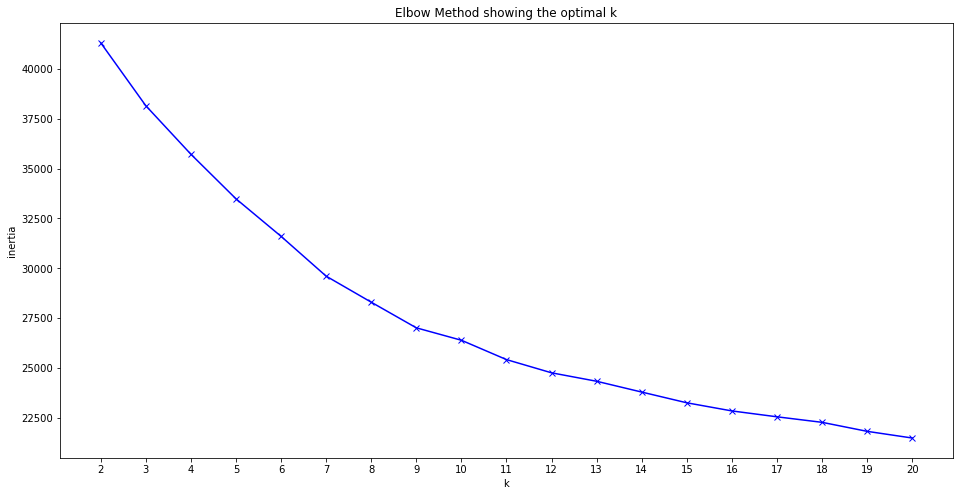

In [38]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(playlist_df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [74]:
def Spotify_Recommendation():
    Song1 = input("Enter your fav Song: ")
    if song1 in playlist
    return 
    
    sp.search(q=Song1, limit=1,market="GB"):
        print(list_of_songs)

In [75]:
Spotify_Recommendation()

Enter your fav Song: dvfg
['3AhXZa8sUQht0UEdBJgpGc', '4CeeEOM32jQcH3eN9Q2dGj', '0hKRSZhUGEhKU6aNSPBACZ', '5t9KYe0Fhd5cW6UYT4qP8f', '2PzU4IB8Dr6mxV3lHuaG34', '1tqT6DhmsrtQgyCKUwotiw', '2G2YzndIA6jeWFPBXhUjh5', '3Am0IbOxmvlSXro7N5iSfZ', '7s25THrKz86DM225dOYwnr', '3Um9toULmYFGCpvaIPFw7l', '2JO3HwMRPeya8bXbtbyPcf', '2QfiRTz5Yc8DdShCxG1tB2', '6hTcuIQa0sxrrByu9wTD7s', '4u9f8hqstB7iITDJNzKhQx', '6xNwKNYZcvgV3XTIwsgNio', '5ChkMS8OtdzJeqyybCc9R5', '4Y4Gd3ty8uut6Qw43c7yJc', '6iGU74CwXuT4XVepjc9Emf', '5moTxUGPZXgGmosl4rIELm', '1Ud6moTC0KyXMq1Oxfien0', '5jzma6gCzYtKB1DbEwFZKH', '5CQ30WqJwcep0pYcV4AMNc', '2mHchPRtQWet3iIS3jANr1', '1J2tfINpEHRhCP8CUS15lE', '7pKfPomDEeI4TPT6EOYjn9', '7Jh1bpe76CNTCgdgAdBw4Z', '6H3kDe7CGoWYBabAeVWGiD', '0xytfctyaudqnrQujHIz3s', '3AszgPDZd9q0DpDFt4HFBy', '09nZ9ZDWq1rTkmM3WjvMvF', '0iA3xXSkSCiJywKyo1UKjQ', '6hHc7Pks7wtBIW8Z6A0iFq', '6RvJigkrHaxStGN2shMJ7h', '4N0TP4Rmj6QQezWV88ARNJ', '19jo0UT2vqD4pNVfIqTy4R', '5LxvwujISqiB8vpRYv887S', '2iXcvnD3d1gfLBum0cE5Eg', '3no0tiiQld